## 문제 1.

1) 활성화 함수란 인공 신경망에서 입력 신호의 가중치 합인 (비선형/선형) 변환을 입력 받아 출력 신호로 (비선형/선형)변환하는 함수이다.

2) 활성화 함수 중 경사하강법에 영향을 주지 않아 학습 속도가 빠르고 기울기 소실 문제가 발생하지 않는 함수는 무엇인가요?

3) 손실 함수란 가중치 학습을 위해 출력 함수의 결과와 실제 값 간의 오차를 측정하는 함수입니다. 그 중 분류 모델의 발견된 확률 분포와 예측 분포 사이의 차이를 측정하는 손실함수는 무엇인가요?

답:

1.선형, 비선형
2.ReLU
3.크로스 엔트로피 손실함수


4) numpy 이용 Softmax 함수 구현

In [3]:
# softmax 함수 식을 고려하여 ???를 채워주세요.
import numpy as np

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y= exp_a /sum_exp_a

  return y

a = np.array([1,2,3,4,5])
print(softmax(a))
print(sum(softmax(a)))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
1.0


5) Softmax 회귀의 비용 함수 (크로스 엔트로피) 구현

In [4]:
import torch
import torch.nn.functional as F

# 3개의 원소를 가진 벡터 텐서 정의하고 소프트맥스 함수의 입력으로 사용
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)


tensor([0.0900, 0.2447, 0.6652])


In [5]:
##문제) 위 세 원소의 합이 1인지 확인하세요.
sum(hypothesis)


tensor(1.)

> 합이 1로 나온다.

In [6]:
# 비용 함수 구현을 위해 임의로 3 x 5 행렬의 크기를 가진 텐서 생성
z = torch.rand(3, 5, requires_grad=True)
# 소프트맥스 함수 적용
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.1982, 0.1712, 0.2389, 0.2016, 0.1902],
        [0.1461, 0.1605, 0.1599, 0.1715, 0.3619],
        [0.1689, 0.2602, 0.1864, 0.1679, 0.2165]], grad_fn=<SoftmaxBackward0>)


In [7]:
# 각 샘플에 대해 임의의 레이블 생성
y = torch.randint(5, (3,)).long()
print(y)

tensor([3, 0, 1])


In [8]:
# 각레이블에 대하여 원-핫 인코딩 수행
y_one_hot= torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)
print(y.unsqueeze(1))


tensor([[3],
        [0],
        [1]])


$ cost(W) = \frac{1}{n}  \sum_1^n  \sum_1^k  y_{j}^{(i)} * (-log(p_{j} ^{(i)}))  $



In [9]:
# 문제))위 수식을 참고하여 비용함수 코드를 구현하세요.

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

print(cost)

tensor(1.6237, grad_fn=<MeanBackward0>)


## 문제 2. DNN 모델 구현을 통한 와인 품질 분류 문제 해결


1) 전처리

아래 코드 두 개를 실행해주세요! (문제 아님)

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [10]:
# 데이터 불러오기
df = pd.read_csv('./dataset/WineQT.csv') ## 경로 입력하세요

df_train, df_val = train_test_split(df, test_size=0.2)

X_train = df_train.drop(['quality', 'Id'], axis=1)
X_val = df_val.drop(['quality', 'Id'], axis=1)

y_train = df_train['quality']
y_val = df_val['quality']

# Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Tensor로 변환
X_train_ts = torch.FloatTensor(X_train)
X_val_ts = torch.FloatTensor(X_val)

y_train_ts = torch.LongTensor(y_train.values)
y_val_ts = torch.LongTensor(y_val.values)

# 배치 학습을 위해 DataLoader 생성
train_dataset = TensorDataset(X_train_ts, y_train_ts)
val_dataset = TensorDataset(X_val_ts, y_val_ts)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


2) 하이퍼파라미터 및 모델 정의

In [11]:
# Hyperparameters 설정 (실행해주세요)
LR = 1e-3
N_EPOCH = 500
DROP_PROB = 0.3

***문제 (1). 다음 코드의 모든 ??? 를 채워주세요.**

In [15]:
X_train_ts.shape[1]

11

In [16]:
# Model 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        # Fully connected layer 정의
         ## 첫번째 입력 크기는 X_train_ts의 열의 개수, 즉 학습 데이터의 특성 개수로 설정하고
         ## 마지막 출력 크기는 11로 설정합니다.
        self.fc1 = nn.Linear(11, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 11)

        # 활성화 함수 (ReLU) 정의
        self.relu = nn.ReLU()

        # 드롭아웃(Dropout) 정의
        self.dropout = nn.Dropout(p=DROP_PROB)

        # Xavier 초기화 적용
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))

    def forward(self, x):
        # Forward pass 정의
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)

        output = self.fc4(x)
        return output

# DNN 모델 인스턴스 생성
model = DNN()

# Optimizer 정의 (Adam 옵티마이저를 사용하며, 학습률은 LR로 설정합니다)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# 손실 함수 정의 (교차 엔트로피 손실 사용)
loss_fn = nn.CrossEntropyLoss()


문제 (2). 위 코드의 torch.nn.Dropout(p)의 의미에 대해 간략하게 설명하세요.

dropout 기법의 목적에 대해 적어주시면 됩니다.

답:
> Drop-out은 서로 연결된 연결망(layer)에서 0부터 1 사이의 확률로 뉴런을 제거(drop)하는 기법이다.

> Drop-out은 어떤 특정한 설명변수 Feature만을 과도하게 집중하여 학습함으로써 발생할 수 있는 과대적합(Overfitting)을 방지하기 위해 사용된다.

3) 모델 학습을 통해 손실과 정확도 측정 \
\
다음 코드를 실행해주세요

In [17]:
# loss와 accuracy 리스트 생성
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# Training loop
for epoch in range(1, N_EPOCH + 1):
    model.train()
    for batch_X, batch_y in train_loader:
        out = model(batch_X)
        loss = loss_fn(out, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        # Training set
        train_out = model(X_train_ts)
        train_loss = loss_fn(train_out, y_train_ts)
        train_acc = (torch.argmax(train_out, dim=1) == y_train_ts).float().mean().item()

        # Validation set
        val_loss, val_acc = 0.0, 0.0
        for batch_X_val, batch_y_val in val_loader:
            out_val = model(batch_X_val)
            val_loss += loss_fn(out_val, batch_y_val).item()
            val_acc += (torch.argmax(out_val, dim=1) == batch_y_val).float().sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc /= len(val_loader.dataset)

    # 손실값과 정확도를 리스트에 추가
    train_losses.append(train_loss.item())
    train_accuracies.append(train_acc * 100)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc * 100)

    if epoch % 20 == 0:
        print('Epoch: {:3d}/{}, Train Loss: {:.4f}, Train Accuracy: {:.2f}%, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'.format(
            epoch, N_EPOCH, train_loss.item(), train_acc * 100, val_loss, val_acc * 100))


Epoch:  20/500, Train Loss: 0.9481, Train Accuracy: 63.46%, Val Loss: 0.0171, Val Accuracy: 60.26%
Epoch:  40/500, Train Loss: 0.8807, Train Accuracy: 64.11%, Val Loss: 0.0165, Val Accuracy: 59.83%
Epoch:  60/500, Train Loss: 0.8387, Train Accuracy: 65.54%, Val Loss: 0.0160, Val Accuracy: 60.26%
Epoch:  80/500, Train Loss: 0.8033, Train Accuracy: 63.89%, Val Loss: 0.0158, Val Accuracy: 63.76%
Epoch: 100/500, Train Loss: 0.7704, Train Accuracy: 66.19%, Val Loss: 0.0155, Val Accuracy: 67.25%
Epoch: 120/500, Train Loss: 0.7482, Train Accuracy: 67.29%, Val Loss: 0.0156, Val Accuracy: 65.94%
Epoch: 140/500, Train Loss: 0.7213, Train Accuracy: 68.93%, Val Loss: 0.0153, Val Accuracy: 65.94%
Epoch: 160/500, Train Loss: 0.6966, Train Accuracy: 69.58%, Val Loss: 0.0157, Val Accuracy: 64.19%
Epoch: 180/500, Train Loss: 0.6647, Train Accuracy: 71.23%, Val Loss: 0.0156, Val Accuracy: 64.63%
Epoch: 200/500, Train Loss: 0.6334, Train Accuracy: 72.76%, Val Loss: 0.0158, Val Accuracy: 62.88%
Epoch: 220

***문제 (3). ???를 채워 loss와 accuracy를 시각화해주세요.**


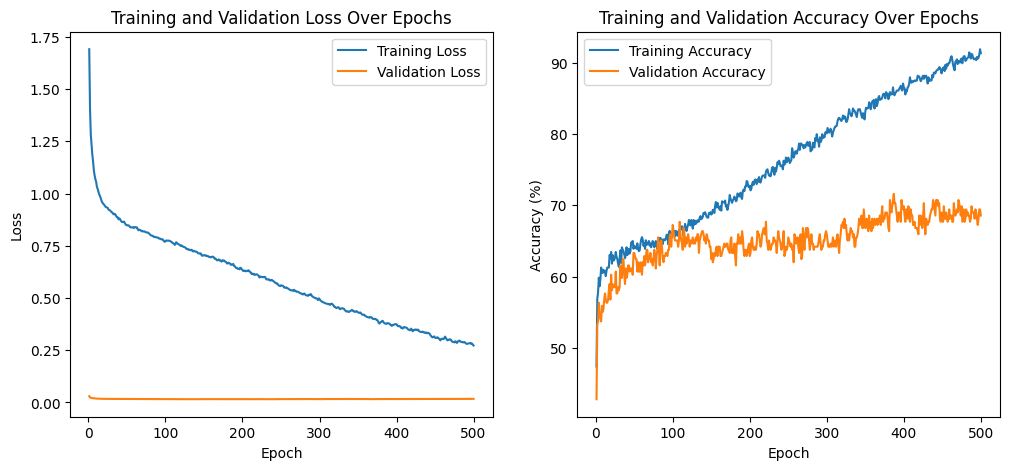

In [18]:
plt.figure(figsize=(12, 5))

# losses 시각화
plt.subplot(1, 2, 1)
plt.plot(range(1, N_EPOCH + 1), train_losses, label='Training Loss')
plt.plot(range(1, N_EPOCH + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# accuracies 시각화
plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCH + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, N_EPOCH + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

plt.show()


## 문제3 (40점)

**3-1 (10점)**
1. 하나의 클래스로부터 단 하나의 객체만 생성할 수 있다.
2. 속성은 클래스 안의 함수를 의미하며, 메소드는 클래스 안의 변수를 의미한다.  
3. 클래스 상속이란 다른 클래스의 변수와 메소드를 물려받아 사용하는 기법이다.
4. 자식 클래스에서 부모 클래스의 속성, 메소드를 사용할 수 있다.
5. 파이토치는 GPU를 사용한 연산이 불가하다는 한계를 가지고 있다.
6. tensor()과 다르게 Tensor()는 입력 데이터에 따라 데이터 type이 변한다.
7. 파이토치에서 permute를 사용하여 여러 차원을 재배치할 수 있다.
8. 넘파이 라이브러리에서 제공하는 np.stack 함수는 배열들을 새로운 축으로  합쳐주며, 두 배열의 차원이 동일하지 않더라도 사용 가능하다.
9. 단어를 벡터로 바꾸어 주는 것을 임베딩이라고 한다.
10. DataLoader 객체는 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기만큼 데이터를 꺼내서 사용한다.

#답
1. T
2. F : 속성 - 클래스 안의 변수, 메소드 - 클래스 안의 함수
3. T
4. T 
5. F - 파이토치는 GPU를 이용한 연산을 한다.
6. T
7. T
8. F : np.stack은 새로운 축을 기준으로 배열을 쌓는데, 쌓기 위해선(np.stack을 위해선) 입력 배열의 차원이 동일하여야한다.
9. T
10. T

**3-2 (10점)**  
"안녕하세요, 나는 포유류 강아지입니다."라는 문장이 출력되도록 아래 코드를 완성하세요.

In [21]:
class 동물:
    def __init__(self, 이름, 종류):
        self.이름 = 이름
        self.종류 = 종류

    def 소개(self):
        return f"안녕하세요, 나는 {self.종류} {self.이름}입니다."

# 객체 생성 및 소개
new_animal = 동물("강아지", "포유류")
print(new_animal.소개())

안녕하세요, 나는 포유류 강아지입니다.


**3-3 (4점)**  
scalar 값이 들어왔을 때 tensor와 Tensor의 차이점은 무엇인가요?

답: 

>tensor는 sclar값을 텐서의 값으로 사용하고, Tensor는 scalar 값을 해당 값의 차원으로 해석하여 초기화되지않은 텐서를 생성한다.

**3-4 (6점)**  
다음은 커스텀 데이터셋 클래스에서 사용되는 메서드에 대한 설명입니다. `__len__, __init__, __getitem__` 를 활용하여 아래의 문장을 완성하세요.



[빈칸1] 메서드는 어떤 인덱스가 주어졌을 때 해당되는 데이터를 반환하는 메서드입니다. numpy 배열이나 텐서 형식으로 반환합니다. 보통 입력과 출력을 튜플 형식으로 반환하게 됩니다.

[빈칸2]은 학습에 사용할 데이터의 총 개수라고 볼 수 있는데, 즉 얼마만큼의 인덱스를 사용할지를 반환하는 메서드입니다.

[빈칸3] 메서드는 객체를 생성할 때 실행되는 메서드, 즉 생성자입니다. 여기에는 모델에 사용할 데이터를 담아두는 등 어떤 인덱스가 주어졌을 때 반환할 수 있게 만드는 초기 작업을 수행합니다.

In [24]:
#빈칸1: __getitem__
#빈칸2: __len__
#빈칸3: __init__

**3-5(10점)**  
다음 출력된 결과를 바탕으로 파이토치에서 'optimizer.zero_grad()'가 필요한 이유를 간단하게 작성하세요.

In [25]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


In [28]:
#답: 위처럼, w.grad에 gradient가 누적되는 문제가 발생할 수 있다. 
# 위와 같은 문제를 optimizer.zero_grad()를 통해 gradient를 0으로 초기화하면
# 정확한 gradient 계산이 가능하며, model 학습이 올바르게 된다.

## 문제4 (60점)

4-1 (15점)
모델의 레이어를 담고 있는 리스트 'all_layers'를 출력했을 때, 다음과 아래와 같은 결과가 나올 수 있도록 빈칸을 채워주세요.

[Linear(in_features=12, out_features=200, bias=True), ReLU(inplace=True), BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.4, inplace=False), Linear(in_features=200, out_features=100, bias=True), ReLU(inplace=True), BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.4, inplace=False), Linear(in_features=100, out_features=50, bias=True), ReLU(inplace=True), BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Dropout(p=0.4, inplace=False), Linear(in_features=50, out_features=4, bias=True)]

In [27]:
#문제X
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('./dataset/car_evaluation.csv')

categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values
categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)

outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]

total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [29]:
#문제
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

**4-2**(15점)
아래의 함수와 동일한 기능(동일한 출력값)을 하는 클래스를 완성하세요.

In [30]:
#문제X
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

#출력
print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


In [31]:
class Calculator:
    def __init__(self):
        self.result = 0
    def add(self,num):
        self.result += num
        return self.result


cal1 = Calculator()
cal2 = Calculator()

#출력
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


**4-3** (15점)  
다음은 선형 회귀 모델을 생성하는 코드입니다. 해당 model이 학습되기 이전 초기 상태의 가중치와 편향을 확인할 수 있는 코드를 완성하고 그 값을 출력하세요.

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
print("weight:", model.weight)
print("bias:", model.bias)

weight: Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)
bias: Parameter containing:
tensor([0.2710], requires_grad=True)


**4-4 (15점)**  
아래의 코드는 단순 선형 회귀 모델을 클래스로 구현하고 있습니다. 빈칸을 채워 코드를 완성하세요.

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):


    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000
